<html style="background-color: black;">
<img align="center"; src="bot/images/lionel-messi.jpg">
<h1 align="center" style="color: blue; margin-top: 1rem;">
    Messi al PSG (analisís de tweets)
</h1>

<h3 align="center",  style="background: yellow; color:black"> Proyecto meramente con fines educativos. </h3>
</html>

<h1 id='Inicio-del-análisis' align="center">Principales caracteristicas de nuestra DB</h1>

In [3]:
# If raises an import error run again
from bot.connection import Dataframe
from wordcloud import WordCloud, STOPWORDS
import emoji as emj
import pandas as pd
import string
import plotly
import re
pd.options.display.max_colwidth = 1000

In [4]:
df = Dataframe().tweets_to_df()

--- COLECCIÓN ---> TWEETS ---> TO DATAFRAME ---> DONE ---


C:\Users\tadeo\OneDrive\Escritorio\Tweepy\bot\connection.py:44: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df = pd.DataFrame(list(data.find({})))


In [5]:
df.head(5)

,_id,Id,User,Followers,FriendsCount,Place,Tweet,RT,Favs,Geo,Coordinates,Language,CreatedAt,Feeling,Timestamp,Date
0,61328ce1d6d1e63d200f58d2,1433897641126072362,👑 The King Fut 👑,160,383,None,Me entro una basurita al ojo 🥲 #messi #CristianoRonaldo #ManchesterUnited #PSG #fifa21 https://t.co/FHNyAdoXcf,0,0,None,None,es,2021-09-03 21:00:12,N,NaN,NaT
1,61328d36d6d1e63d200f58d3,1433897996731695106,⚽💙 Boca 💛Juniors 💙⚽,782,960,La Bombonera,Y las disculpas para #Messi 😡😡😡😡 jueputa casi lo retiras antes de tiempo caimán... Ojalá ese ensañamiento no se te… https://t.co/T3xT4St1EQ,0,0,None,None,es,2021-09-03 21:01:37,N,NaN,NaT
2,61328d86d6d1e63d200f58d6,1433898330979913728,Spoorts English,0,27,None,All sports | All levels | Clubs | Players | Fans | Local merchants | Geolocated contents | 12 languages \n#messi |… https://t.co/UKf510Do8z,0,0,None,None,en,2021-09-03 21:02:57,P,NaN,NaT
3,61328e35d6d1e63d200f58dd,1433899064651886592,Matemáticas de Jalón,2124,108,None,De locos bebes #messi,0,0,None,None,es,2021-09-03 21:05:52,NONE,NaN,NaT
4,613290e4d6d1e63d200f58eb,1433901947921313794,⭐Chris⭐🇫🇷 et 🇵🇹,16,118,None,Le tacle sur #Messi est honteux purement et simplement et pourtant pas fan du personnage surtout depuis cet été #EDS,0,0,None,None,fr,2021-09-03 21:17:19,N,NaN,NaT


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   _id           5020 non-null   object        
 1   Id            5020 non-null   object        
 2   User          5020 non-null   object        
 3   Followers     5020 non-null   int64         
 4   FriendsCount  5020 non-null   int64         
 5   Place         5020 non-null   object        
 6   Tweet         5020 non-null   object        
 7   RT            5020 non-null   int64         
 8   Favs          5020 non-null   int64         
 9   Geo           5 non-null      object        
 10  Coordinates   5 non-null      object        
 11  Language      5020 non-null   object        
 12  CreatedAt     5020 non-null   datetime64[ns]
 13  Feeling       5020 non-null   object        
 14  Timestamp     18 non-null     object        
 15  Date          3265 non-null   datetime

In [7]:
df.isnull().sum()

_id                0
Id                 0
User               0
Followers          0
FriendsCount       0
Place              0
Tweet              0
RT                 0
Favs               0
Geo             5015
Coordinates     5015
Language           0
CreatedAt          0
Feeling            0
Timestamp       5002
Date            1755
dtype: int64

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Followers,5020.00,40795.97,317194.28,0.00,15.00,193.00,1725.00,5469087.00
FriendsCount,5020.00,832.81,2110.49,0.00,78.00,267.00,750.25,47699.00
RT,5020.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Favs,5020.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
df['Language'].unique()

array(['es', 'en', 'fr', 'it', 'pt', 'tr', 'ja', 'de', 'ar', 'ca', 'vi',
       'et', 'da', 'hi', 'ht', 'el', 'nl', 'sv', 'th', 'ru', 'lt', 'ur',
       'bn', 'fi', 'ml', 'pl', 'ro', 'cy', 'cs', 'eu', 'is'], dtype=object)

<h1 align="center">Limpieza de URL's y Conteo de Emojis.</h1>

In [10]:
# Comenzamos limpieza de tweets (todos estos seran convertidos en minuscula), también vamos a proceder a eliminar url's mediante REGEX
df['Tweet'] = df['Tweet'].apply(lambda tweet: tweet.lower().strip())
df['Tweet'] = df['Tweet'].replace(r'http[s]\S+|www\S+', '', regex=True)
def decode_tweet(tweet):
    tweet.encode('utf-16', 'surrogatepass').decode('utf-16')
    return tweet
df['Tweet'] = df['Tweet'].apply(lambda tweet: decode_tweet(tweet))

In [11]:
# En este punto, junto con la lib emoji, detectamos a estos y los representamos en otra columna
df['Emoji'] = None
for index, row in df[['Tweet', 'Language', 'Emoji']].iterrows():
    try:
        emojis = emj.UNICODE_EMOJI[row['Language']]
    except KeyError:
        emojis = emj.UNICODE_EMOJI['en']
    for emoji in emojis:
        if emoji in row['Tweet']:
            df.loc[index, ['Emoji']] = emoji

# Conteo de emojis por tipo
count_emojis = df['Emoji'].value_counts().to_frame().reset_index()
count_emojis.columns = ['Emoji', 'Count']
bar = count_emojis[count_emojis['Count'] > 20]

In [24]:
# Representación mediante un Pie Plot
import plotly.express as px
fig = px.pie(bar, values='Count', names='Emoji')
fig.update_layout(title_text="Pie plot of emojis used in Messi's tweets", title_y=0.94, title_x=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=12)
fig.update_layout(
    autosize=False,
    width=700,
    height=700)
fig.show()

<h1 align="center">Limpieza de etiquetas y caracteres</h1>

In [39]:
def spaces(tweet):
    tweet = ''.join([char if char not in string.punctuation else ' ' for char in tweet])
    return tweet

tweets = df['Tweet']
tweets.replace('@[A-Za-z0-9]+|[0–9]+|_[A-Za-z0-9]+|[0–9]+|#[A-Za-z0-9]+', '', regex=True, inplace=True)
tweets.apply(lambda tw: spaces(tw))
tweets.replace('[^A-Za-z0–9_. ]+', '', regex=True, inplace=True)
tweets.sample(10)

2407                                                                         lionel messi  messi  goat argentina 
3281           si te lo perdiste aqu te tenemos los resultados  el psg de messi no pudo con el brujas. liverpool 
2377    grieving son  years later how the pandemic now ends what must be done to end it community nfts and  best 
2876             available now with  off using ha pulisic ronaldo afc mufc cfc lfc premierleague messi suarez cr 
4243                                             messi no tiene comparacin menos va tener cambio . pochettino psg
3015                                  forgot it is  night  checking scores to find out  without messi losing to  
2506                                                                                          inevitable thmessi 
83       neymar et messi sont coquipiers au psg mais ils seront face  face ce soir h pm  larena corinthians de s 
3362                     photos buhari gets no  football jersey from fifa presidentbuhar

<h1 align="center">Mask image con numpy</h1>

In [44]:
# No va a servir para la nube de palabras, lo que hace numpy es representar esta imagen de la forma de "array booleano"
import numpy as np
from PIL import Image
messi_mask = np.array(Image.open(r'bot/images/messigod.png'))
messi_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [41]:
# Desde nltk importamos stop_words estandarizados, son palabras "sin significado" (pronombres, articulos, etc)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')
stop_words_es = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tadeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


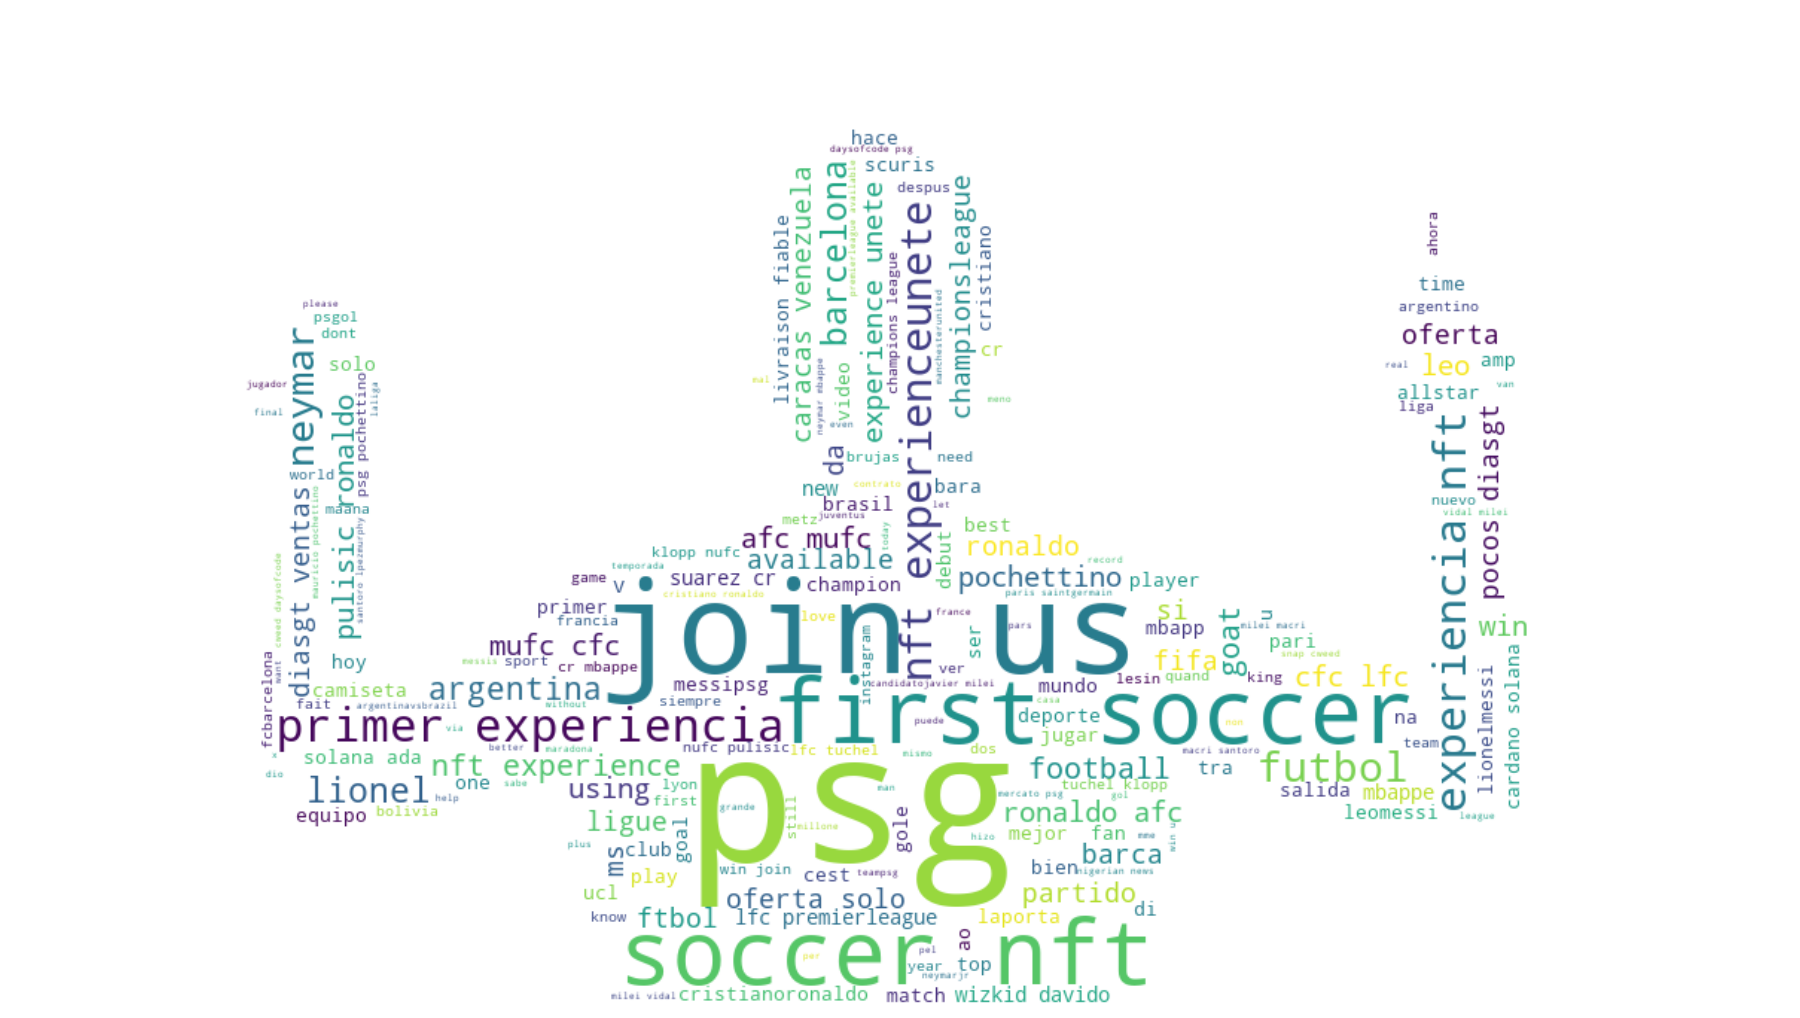

In [43]:
# Ploteamos la nube de palabras seteando stopwords (lista) 
stopwords = set(STOPWORDS)
stopwords.update(['binance', 'messi',
                  'cryptocurrency', 'halcones', 'xrp', 'nftcollection', 'sputnik', 'coin', 'coinmarketcap', 
                  'dj', 'blogger', 'coinbase', '_', '_brulik', 'q', 'f', 'p', 'va']+stop_words_en+stop_words_fr+stop_words_es)
import matplotlib.pyplot as plt
input_ = ' '.join(tweets)
wordcloud = WordCloud(stopwords=stopwords, mask=messi_mask, background_color="white").generate(input_)
plt.figure(figsize=(32, 32))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1 align="center">Analisis de Sentimientos (el script ya se encargo de setear cada sentimiento)</h1>

In [29]:
# Sentimientos
df['Feeling'].unique()

array(['N', 'P', 'NONE', 'NEU', 'N+', 'P+', ''], dtype=object)

In [45]:
# Traemos columnas "Place" & "Feeling" y limpiamos de caracteres raros, también aplicamos lower.
# Place es aquel dato que sale en el usuario (generalmente aca se ponen localidades veridicas y de fantasia)
feeling_data =  df[(df['Place'].notnull()) & (df['Place'] != 'None')][['Place', 'Feeling']]
feeling_data['Place'] = feeling_data['Place'].apply(lambda place: place.lower().strip())
feeling_data['Place'].replace('[^A-Za-z0–9_. ]+', '', regex=True, inplace=True)
feeling_data

,Place,Feeling
1,la bombonera,N
6,espaa,N
7,lucca toscana,NEU
9,venezuela,NONE
10,nigeria,P
...,...,...
5012,costa rica,NONE
5013,mexico,NONE
5014,,P+
5015,united states,P+


In [31]:
# Estandarizamos estas locaciones en un lenguaje mediante googletrans
from googletrans import Translator
translator = Translator()
# Estandarizamos en un solo lenguaje
places = feeling_data['Place']
def translate_place(place):
    translated_place = translator.translate(place, dest='en')
    return translated_place
places.apply(lambda place: translate_place(place))

1       Translated(src=es, dest=en, text=the Bombonera, pronunciation=the Bombonera, extra_data="{'translat...")
6                       Translated(src=en, dest=en, text=espaa, pronunciation=espaa, extra_data="{'translat...")
7       Translated(src=it, dest=en, text=lucca tuscany, pronunciation=lucca tuscany, extra_data="{'translat...")
9               Translated(src=en, dest=en, text=venezuela, pronunciation=venezuela, extra_data="{'translat...")
10                  Translated(src=en, dest=en, text=nigeria, pronunciation=nigeria, extra_data="{'translat...")
                                                          ...                                                   
5012          Translated(src=en, dest=en, text=costa rica, pronunciation=costa rica, extra_data="{'translat...")
5013                  Translated(src=en, dest=en, text=mexico, pronunciation=mexico, extra_data="{'translat...")
5014                              Translated(src=en, dest=en, text=, pronunciation=, extra_data=

In [32]:
feeling_data['Place'] = places
# Importamos paises y sus coordenadas (excel se encuentra en el repo) en formato dataframe
coordinates = pd.read_excel(r'bot/dataset/countries.xlsx')
coordinates

,country,latitude,longitude,name
0,AD,42.55,1.60,Andorra
1,AE,23.42,53.85,United Arab Emirates
2,AF,33.94,67.71,Afghanistan
3,AG,17.06,-61.80,Antigua and Barbuda
4,AI,18.22,-63.07,Anguilla
...,...,...,...,...
240,YE,15.55,48.52,Yemen
241,YT,-12.83,45.17,Mayotte
242,ZA,-30.56,22.94,South Africa
243,ZM,-13.13,27.85,Zambia


In [33]:
# Lo que hacemos, es estandarizar los nombres de los paises del excel, setear dos columnas vacias en feeling_data (longitude y latitude)
# Posteriormente se trata de matchear pais de los tweets con el del df de coordenadas y appendeamos las coordenadas correspondientes
from difflib import SequenceMatcher
coordinates['name'] = coordinates['name'].apply(lambda name: name.lower())
feeling_data = feeling_data.reset_index().drop(['index'], axis=1)
feeling_data['latitude'] = ''
feeling_data['longitude'] = ''
for index, place in feeling_data.iterrows():
    for index2, data in coordinates.iterrows():
        if data['name'] in place['Place'] or SequenceMatcher(None, data['name'], place['Place']).ratio() > 0.85:
            place['Place'] = data['name']
            place['latitude'] = data['latitude']
            place['longitude'] = data['longitude']
            break
feeling_data

,Place,Feeling,latitude,longitude
0,la bombonera,N,,
1,espaa,N,,
2,lucca toscana,NEU,,
3,venezuela,NONE,6.42,-66.59
4,niger,P,17.61,8.08
...,...,...,...,...
2996,costa rica,NONE,9.75,-83.75
2997,mexico,NONE,23.63,-102.55
2998,,P+,,
2999,united states,P+,37.09,-95.71


In [34]:
# Una vez hechos y reemplazados los matches, nos quedamos con aquellas rows que tienen coordenadas.
feeling_data['latitude'].replace({'':None}, inplace=True)
feeling_data['longitude'].replace({'':None}, inplace=True)
feeling_data.dropna(inplace=True)
feeling_data['Place'] = feeling_data['Place'].apply(lambda place: place.title())
# Hacemos un groupby por locacion y sentimiento, contando la cantidad de sentimientos diferentes por pais.
group = feeling_data.groupby(['Place', 'Feeling']).Feeling.size().unstack().sort_values(['Place'], ascending=True)
group.drop('NONE', inplace=True, axis=1)
group.dropna(how='all', inplace=True)

Text(0, 0.5, 'Conteo de Tweets')

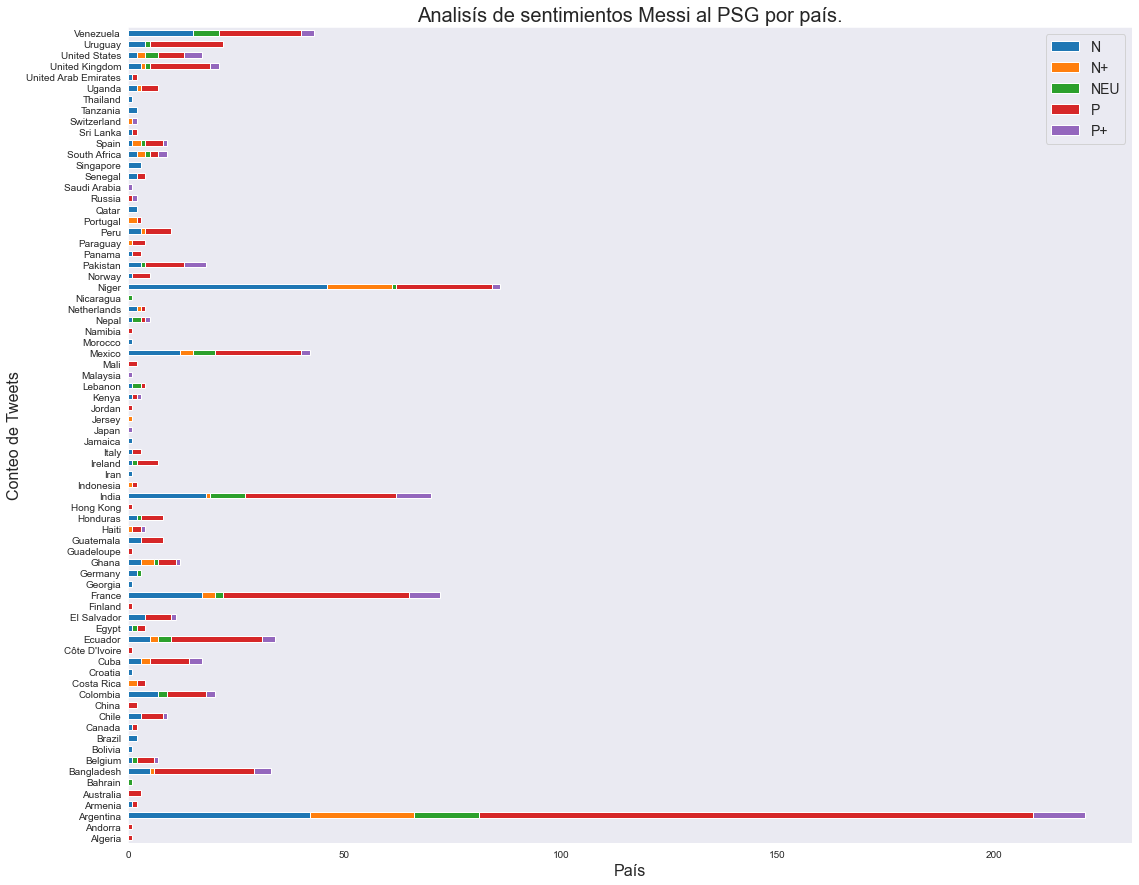

In [35]:
# Ploteamos un barplot con seaborn
import seaborn as sns
sns.set_style("dark")
plt.rcParams['figure.figsize'] = (18, 15)
group.plot(kind='barh', stacked=True)
plt.title('Analisís de sentimientos Messi al PSG por país.', fontsize=20)
plt.legend(prop={'size': 14})
plt.xlabel('País', fontsize=16)
plt.ylabel('Conteo de Tweets', fontsize=16)

In [36]:
# Luego agrupamos por localidad, latitud, y longitud, haciendo un conteo de localidades
feeling_data.drop('Feeling', inplace=True, axis=1)
places = feeling_data.groupby(['Place', 'latitude', 'longitude'], as_index=False).Place.size()
places = places[places['size'] > 15]

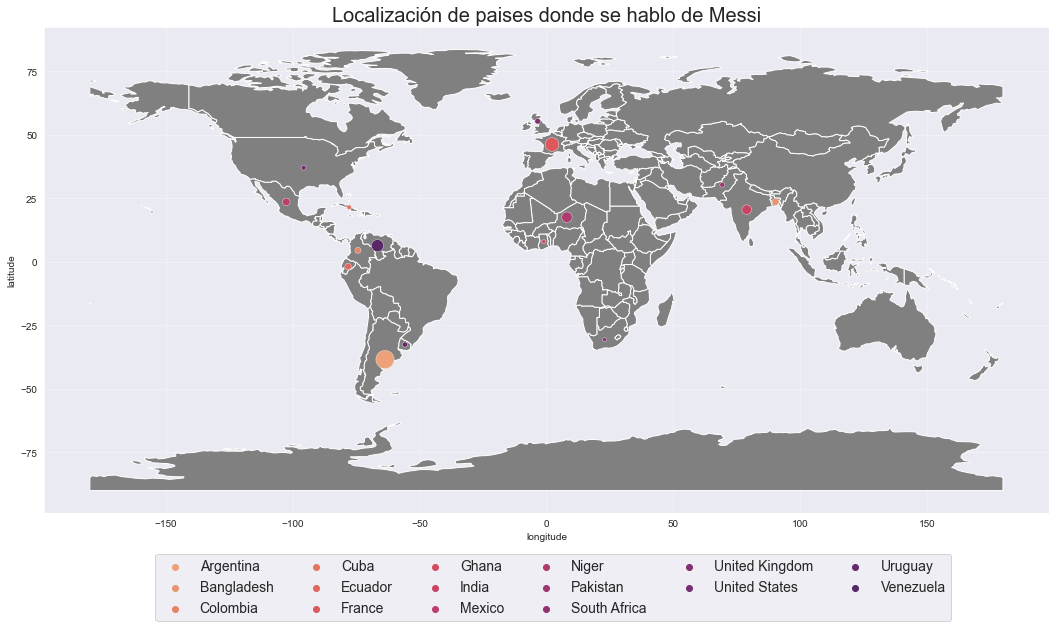

In [37]:
# Importamos geopandas, una libreria para trabajar con datos geoespaciales.
# Traemos un plot estandarizado del mundo con geopandas, y sobre el hacemos un scatterplot con sns usando la latitud (y) y longitud (x)
import geopandas as gpd
import seaborn as sns
%matplotlib inline
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(18, 14))
countries.plot(color="grey", ax=ax)
sns.scatterplot(x='longitude', y='latitude', hue='Place', data=places, legend='auto',
                     palette='flare', s=places['size'], sizes=(20, 200), ax=ax)
ax.legend(loc='best', ncol=6, bbox_to_anchor=(0.91, -0.07), prop={'size': 14})
ax.grid(b=True, alpha=0.4)
plt.title('Localización de paises donde se hablo de Messi', fontsize=20)
plt.show()

In [38]:
# Posteriormente, hacemos un grafico mas interactivo con plotly, mostrando verdaderamente el conteo de tweets por pais
import plotly.graph_objects as go
scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'ISO-3',
        lon = places['longitude'],
        lat = places['latitude'],
        text = places[['Place', 'size']],
        mode = 'markers',
        marker = dict(
            size = places['size']/8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = places['size'],
            cmax = places['size'].max(),
            colorbar_title="Conteo de tweets/país"
        )))

fig.update_layout(
        title = 'Mapa mundial Messi',
        geo = dict(
            showland = True,
            showsubunits = True,
            showcountries = True,
            resolution = 50,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()